<a href="https://colab.research.google.com/github/JanDziewulski/MachineLearningProjects/blob/master/Dane_gie%C5%82dowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import bibliotek

import pandas as pd 
import numpy as np 

print(f"Pandas wersja: {pd.__version__}")
print(f"Numpy wersja: {np.__version__}")

Pandas wersja: 1.0.4
Numpy wersja: 1.18.5


In [2]:
#Zaczytywanie danych 

def fetch_financial_data(company = 'AMZN'):
  import pandas_datareader.data as web
  return web.DataReader(name = company, data_source='stooq')


In [3]:
df = fetch_financial_data()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-06-16 to 2015-06-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [5]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-16,2620.00,2620.0000,2576.0000,2615.27,3595649
2020-06-15,2526.60,2584.0000,2508.0001,2572.68,3873335
2020-06-12,2601.21,2621.4766,2503.3500,2545.02,5436127
2020-06-11,2603.50,2671.3800,2536.2300,2557.96,5800107
2020-06-10,2645.00,2722.3500,2626.2600,2647.45,4946031


In [6]:
df.shape

(1257, 5)

In [7]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2015-06-25,438.07,443.47,436.39,440.10,2237400
2015-06-24,444.97,446.47,440.23,440.84,2620800
2015-06-23,435.58,447.04,433.69,445.99,3245049
2015-06-22,437.03,439.24,434.18,436.29,1823500
2015-06-19,440.26,444.99,433.24,434.92,4495000


In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
df.columns = [col.lower() for col in df.columns]

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1257.0,1.275714e+03,5.547595e+02,434.21,764.550,1173.85,1781.99,2645.00
high,1257.0,1.288319e+03,5.614266e+02,435.57,769.640,1182.75,1795.57,2722.35
low,1257.0,1.261642e+03,5.481109e+02,425.57,759.199,1167.50,1761.55,2626.26
close,1257.0,1.275719e+03,5.551037e+02,429.70,764.630,1176.75,1780.75,2647.45
volume,1257.0,4.235704e+06,2.209253e+06,881337.00,2779828.000,3677306.00,5026504.00,21909300.00


In [12]:
df['open']

Date
2020-06-16    2620.00
2020-06-15    2526.60
2020-06-12    2601.21
2020-06-11    2603.50
2020-06-10    2645.00
               ...   
2015-06-25     438.07
2015-06-24     444.97
2015-06-23     435.58
2015-06-22     437.03
2015-06-19     440.26
Name: open, Length: 1257, dtype: float64

In [16]:
df[['open','close']]

,open,close
Date,,
2020-06-16,2620.00,2615.27
2020-06-15,2526.60,2572.68
2020-06-12,2601.21,2545.02
2020-06-11,2603.50,2557.96
2020-06-10,2645.00,2647.45
...,...,...
2015-06-25,438.07,440.10
2015-06-24,444.97,440.84
2015-06-23,435.58,445.99


In [22]:
df.loc['2019-12-10':'2019-12-02']

,open,high,low,close,volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979
2019-12-05,1763.50,1763.50,1740.00,1740.48,2827852
2019-12-04,1774.01,1789.09,1760.22,1760.69,2680700
2019-12-03,1760.00,1772.87,1747.23,1769.96,3529582
2019-12-02,1804.40,1805.55,1762.68,1781.60,3931750


In [24]:
#Obliczanie nowych kolumn

df = fetch_financial_data('UBER')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278 entries, 2020-06-16 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    278 non-null    float64
 1   High    278 non-null    float64
 2   Low     278 non-null    float64
 3   Close   278 non-null    float64
 4   Volume  278 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.0 KB


In [25]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-16,34.00,34.170,32.4300,33.49,21377119
2020-06-15,31.16,32.680,31.0201,32.67,21350290
2020-06-12,32.73,32.740,31.0400,32.24,27685169
2020-06-11,32.63,33.245,30.8904,31.10,45298714
2020-06-10,36.69,36.800,34.2650,34.83,43473719


In [26]:
df.sample(10)

,Open,High,Low,Close,Volume
Date,,,,,
2019-10-30,32.51,33.80,32.1100,33.75,10861056
2020-03-20,22.53,23.89,20.6100,21.33,76529684
2019-05-29,40.52,40.71,39.1473,39.94,14060447
2020-02-27,32.03,34.16,30.6700,32.45,66557245
2020-05-01,29.13,29.72,28.3250,28.39,19290192
2020-04-07,27.95,28.11,25.5000,25.74,36433762
2019-09-03,32.10,32.53,30.6650,30.70,12194312
2019-06-05,42.87,45.66,42.5000,45.00,28609604
2019-08-27,33.69,34.24,32.9800,33.11,6596129


In [33]:
df.describe()

,Open,High,Low,Close,Volume
count,278.000000,278.000000,278.000000,278.000000,2.780000e+02
mean,34.143340,34.849587,33.308620,34.101691,2.577885e+07
std,6.152938,6.069302,6.180995,6.084742,2.169884e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,29.475000,30.132500,28.910000,29.570000,9.360834e+06
50%,33.305000,34.120000,32.445000,33.220000,2.138191e+07
75%,39.460000,40.200000,38.414375,39.690000,3.445374e+07
max,46.980000,47.080000,45.080000,46.380000,1.863225e+08


In [34]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-16,34.00,34.17,32.4300,33.49,21377119
2020-06-15,31.16,32.68,31.0201,32.67,21350290
2020-06-12,32.73,32.74,31.0400,32.24,27685169


In [39]:
df['AVG'] = (df['Open'] + df['Close'])/2

In [43]:
df = df.sort_index()

In [45]:
df['Close_shift'] = df[['Close']].shift(1)

In [46]:
df

,Open,High,Low,Close,Volume,nowa,AVG,Close_shift
Date,,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,41.785,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,37.945,41.57
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,39.135,37.10
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,40.330,39.96
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,42.240,41.29
...,...,...,...,...,...,...,...,...
2020-06-10,36.69,36.800,34.2650,34.83,43473719,35.760,35.760,36.59
2020-06-11,32.63,33.245,30.8904,31.10,45298714,31.865,31.865,34.83
2020-06-12,32.73,32.740,31.0400,32.24,27685169,32.485,32.485,31.10


In [76]:
df['Daily_change'] = df.Close / df.Close_shift  - 1 

In [77]:
df

,Open,High,Low,Close,Volume,nowa,AVG,Close_shift,Daily_change,Daily_change_%
Date,,,,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,42.240,41.29,0.041414,0.041414
...,...,...,...,...,...,...,...,...,...,...
2020-06-10,36.69,36.800,34.2650,34.83,43473719,35.760,35.760,36.59,-0.048101,-0.048101
2020-06-11,32.63,33.245,30.8904,31.10,45298714,31.865,31.865,34.83,-0.107092,-0.107092
2020-06-12,32.73,32.740,31.0400,32.24,27685169,32.485,32.485,31.10,0.036656,0.036656


In [79]:
del df['Daily_change_%']

In [80]:
df

,Open,High,Low,Close,Volume,nowa,AVG,Close_shift,Daily_change
Date,,,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...,...
2020-06-10,36.69,36.800,34.2650,34.83,43473719,35.760,35.760,36.59,-0.048101
2020-06-11,32.63,33.245,30.8904,31.10,45298714,31.865,31.865,34.83,-0.107092
2020-06-12,32.73,32.740,31.0400,32.24,27685169,32.485,32.485,31.10,0.036656


In [86]:
df['Daily_change'].min()

-0.21628767847699626

In [87]:
df['Daily_change'].max()

0.3825910931174088

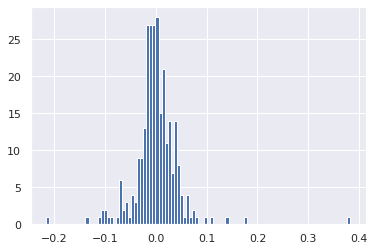

In [89]:
import seaborn as sns 
sns.set()
df.Daily_change.hist(bins=100)

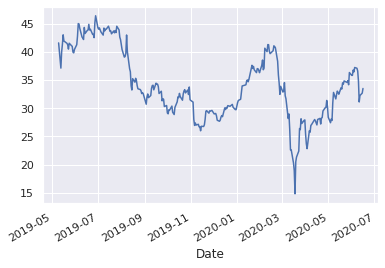

In [90]:
df.Close.plot()

In [103]:
df_positive = df[df.Daily_change > 0 ]

In [106]:
df_positive.Daily_change.mean()

0.03000675327378007

In [107]:
df_negative = df[df.Daily_change < 0 ]

In [108]:
df_negative.Daily_change.mean()

-0.02628765253710118

In [109]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2020-06-10    False
2020-06-11    False
2020-06-12    False
2020-06-15    False
2020-06-16    False
Length: 278, dtype: bool

In [110]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,nowa,AVG,Close_shift,Daily_change
Date,,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,41.395,40.47,0.025698


In [112]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,nowa,AVG,Close_shift,Daily_change
Date,,,,,,,,,
2019-11-04,31.45,31.750,30.1200,31.08,32330121,31.265,31.265,31.37,-0.009245
2019-11-05,29.13,29.300,27.9700,28.02,52180615,28.575,28.575,31.08,-0.098456
2019-11-06,26.06,27.550,25.5800,26.94,133569790,26.500,26.500,28.02,-0.038544
2019-11-07,26.80,27.420,26.4500,27.38,65949472,27.090,27.090,26.94,0.016333
2019-11-08,27.48,27.620,26.9150,27.01,45263118,27.245,27.245,27.38,-0.013514
...,...,...,...,...,...,...,...,...,...
2020-06-10,36.69,36.800,34.2650,34.83,43473719,35.760,35.760,36.59,-0.048101
2020-06-11,32.63,33.245,30.8904,31.10,45298714,31.865,31.865,34.83,-0.107092
2020-06-12,32.73,32.740,31.0400,32.24,27685169,32.485,32.485,31.10,0.036656


In [113]:
df[(df.index >= '2019-11-01') & (df.index >= '2019-11-15')]

,Open,High,Low,Close,Volume,nowa,AVG,Close_shift,Daily_change
Date,,,,,,,,,
2019-11-15,26.18,26.800,25.9550,26.79,41372771,26.485,26.485,25.99,0.030781
2019-11-18,26.80,27.000,26.3000,26.75,37309667,26.775,26.775,26.79,-0.001493
2019-11-19,26.77,27.220,26.6100,27.05,34115865,26.910,26.910,26.75,0.011215
2019-11-20,27.06,28.400,26.9450,28.03,54075774,27.545,27.545,27.05,0.036229
2019-11-21,28.67,29.600,28.5000,29.46,55658629,29.065,29.065,28.03,0.051017
...,...,...,...,...,...,...,...,...,...
2020-06-10,36.69,36.800,34.2650,34.83,43473719,35.760,35.760,36.59,-0.048101
2020-06-11,32.63,33.245,30.8904,31.10,45298714,31.865,31.865,34.83,-0.107092
2020-06-12,32.73,32.740,31.0400,32.24,27685169,32.485,32.485,31.10,0.036656
